In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
# Load dataset from Google Drive
import pandas as pd

# Path to your uploaded file
file_path = "/content/drive/MyDrive/CreditScoringProject/data/credit_risk_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Show first few rows
df.head()



person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [ ]:
# Basic dataset information
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)
print("\nMissing values:\n")
print(df.isnull().sum())


Shape of dataset: (32581, 12)

Column Names:
 ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']

Data Types:

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Missing values:

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amn

In [ ]:
# numeric summary
df.describe()


person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

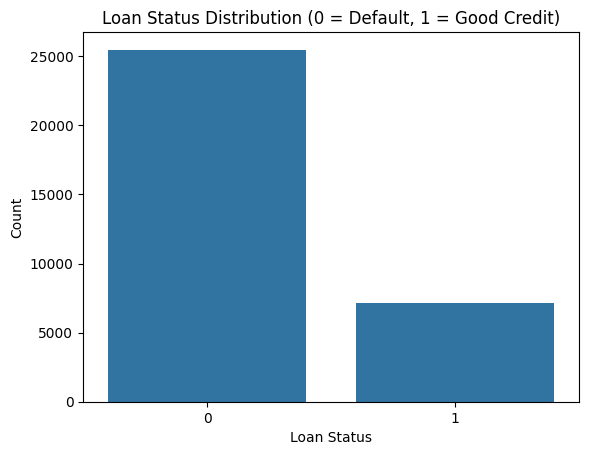

loan_status
0    78.18
1    21.82
Name: proportion, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution (0 = Default, 1 = Good Credit)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# percentage distribution
(df['loan_status'].value_counts(normalize=True) * 100).round(2)


In [ ]:
#  Check unique values for categorical columns
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Sample categories: {df[col].unique()}")



Column: person_home_ownership
Unique values: 4
Sample categories: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique values: 6
Sample categories: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: loan_grade
Unique values: 7
Sample categories: ['D' 'B' 'C' 'A' 'E' 'F' 'G']

Column: cb_person_default_on_file
Unique values: 2
Sample categories: ['Y' 'N']


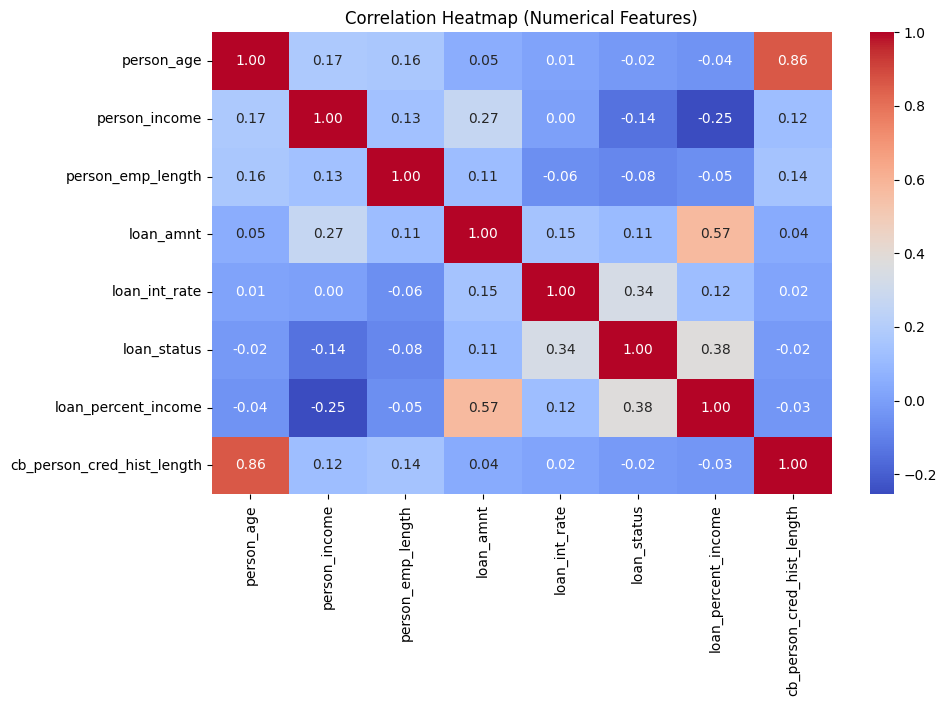

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#   Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


In [ ]:
#  Handle missing values

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate']     = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# Verify no missing values remain
print("Remaining missing values:\n", df.isnull().sum())


Remaining missing values:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
import pandas as pd

cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# one-hot encode (drop_first avoids duplicate/collinearity)
df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("New shape after encoding:", df_enc.shape)
df_enc.head()


New shape after encoding: (32581, 23)


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                        False                      False  ...   
1                        False                       True  ...   
2                        False                      False  ...   
3                        False                      False  ...   
4                        False                      False  ...   

   loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
0                False                  True                False   
1                False                 False                False   
2                 True                 False                False   
3                 True                 False                False   
4                 True                 False                False   

   loan_grade_B  loan_grade_C  loan_grade_D  loan_grade_E  loan_grade_F  \
0         False         False          True         False         False   
1          True         False         False         False         False   
2         False          True         False         False         False   
3         False          True         False         False         False   
4         False          True         False         False         False   

   loan_grade_G  cb_person_default_on_file_Y  
0         False                         True  
1         False                        False  
2         False                        False  
3         False                        False  
4         False                         True  

[5 rows x 23 columns]

In [ ]:
#  Split features and target
X = df_enc.drop('loan_status', axis=1)
y = df_enc['loan_status']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (32581, 22)
Target (y) shape: (32581,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("\nTraining class balance:\n", y_train.value_counts(normalize=True).round(3))
print("Testing class balance:\n", y_test.value_counts(normalize=True).round(3))


Training samples: 26064
Testing samples: 6517

Training class balance:
 loan_status
0    0.782
1    0.218
Name: proportion, dtype: float64
Testing class balance:
 loan_status
0    0.782
1    0.218
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate performance
print(" Logistic Regression Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Model Evaluation:
Accuracy: 0.7178

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.80      5095
           1       0.42      0.78      0.55      1422

    accuracy                           0.72      6517
   macro avg       0.67      0.74      0.67      6517
weighted avg       0.81      0.72      0.74      6517



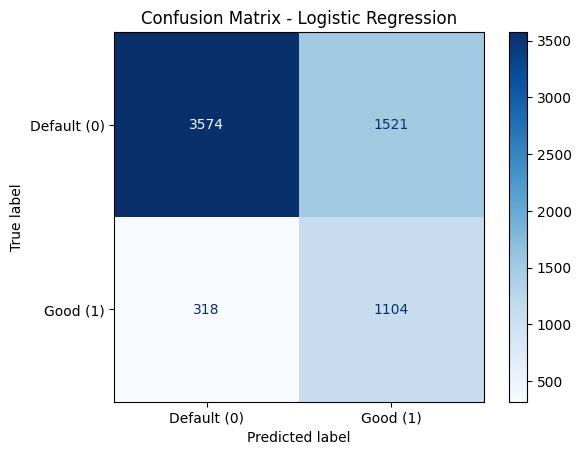

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Default (0)", "Good (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  self.feature_perturbation = "correlation_dependent"


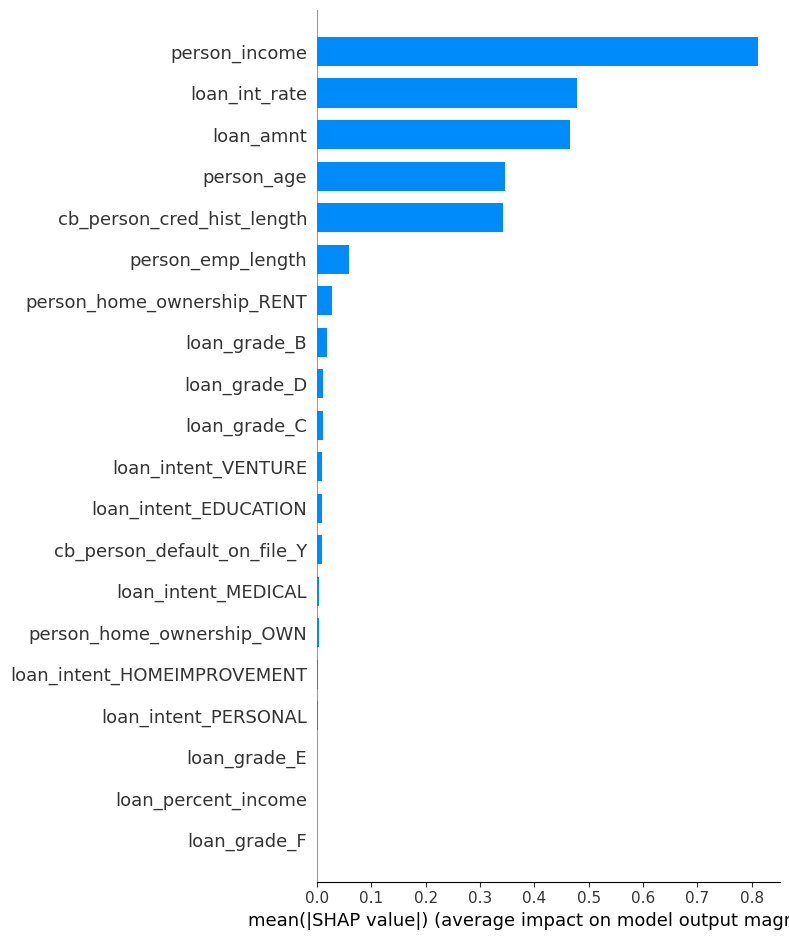

In [ ]:
# SHAP Explainability (Stable Colab Version)
!pip install shap==0.46.0 numpy==2.1.3 matplotlib==3.9.2 --quiet

import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert data to numpy safely (to avoid dtype errors)
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Create the SHAP explainer (Logistic Regression model)
explainer = shap.LinearExplainer(log_reg, X_train_array, feature_perturbation="interventional")

# Compute SHAP values
shap_values = explainer.shap_values(X_test_array)

#  Manual beeswarm-like visualization (works in Python 3.12)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

#  Local explanation for one sample
index = 0  # change for other samples
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index, :], X_test.iloc[index, :])


In [ ]:
#  LIME Explainability

!pip install lime==0.2.0.1 --quiet

import lime
import lime.lime_tabular
import numpy as np

#  Create the LIME Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Default (0)', 'Good Credit (1)'],
    mode='classification'
)

#  Pick one borrower to explain
sample_index = 0   # change to test others
sample_data = X_test.iloc[sample_index]

#  Explain that single prediction
exp = explainer_lime.explain_instance(
    data_row=sample_data,
    predict_fn=log_reg.predict_proba
)

# Display as chart + text
exp.show_in_notebook(show_table=True)
exp.as_list()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

[('38443.25 < person_income <= 55000.00', 0.14101475098353633),
 ('person_home_ownership_OTHER <= 0.00', 0.10239513126905003),
 ('cb_person_cred_hist_length <= 3.00', -0.10161209130281938),
 ('person_age <= 23.00', 0.09677854837738668),
 ('5000.00 < loan_amnt <= 8000.00', -0.06881621535325866),
 ('10.99 < loan_int_rate <= 13.11', 0.03897835714451785),
 ('person_home_ownership_OWN <= 0.00', 0.0362871648124728),
 ('loan_grade_E <= 0.00', 0.025493233027120973),
 ('4.00 < person_emp_length <= 7.00', -0.021443266847454637),
 ('loan_grade_C <= 0.00', 0.02134341903059917)]

 Model Performance Summary

 > Accuracy: 0.7178

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      5095
           1       0.42      0.78      0.55      1422

    accuracy                           0.72      6517
   macro avg       0.67      0.74      0.67      6517
weighted avg       0.81      0.72      0.74      6517



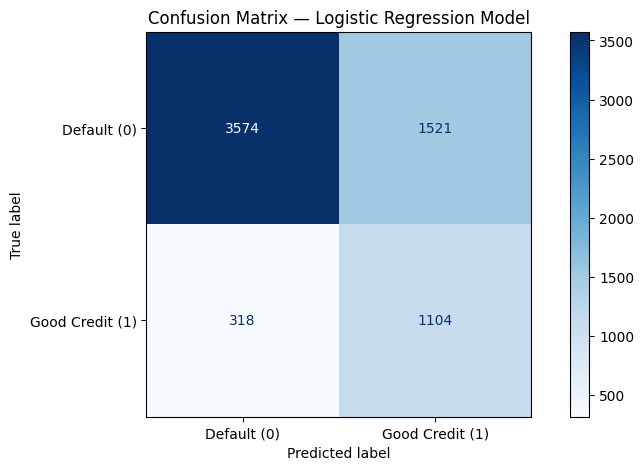


   Global Feature Importance (SHAP Summary)


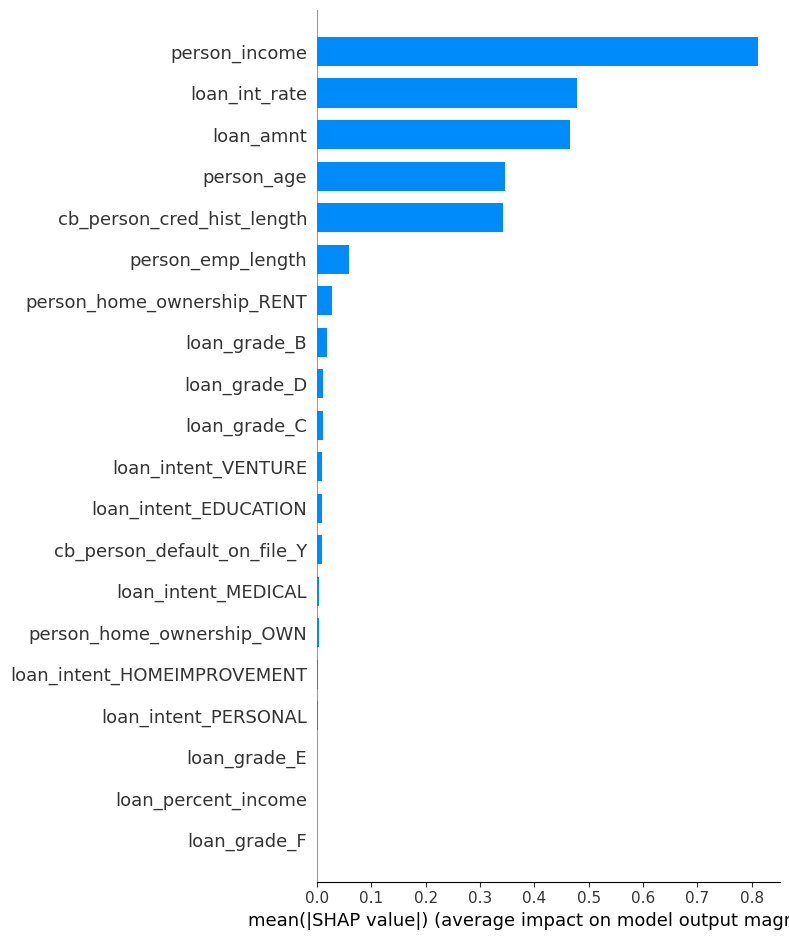


 > Local SHAP Explanation (Force Plot for One Borrower)

 > Local LIME Explanation for the Same Borrower


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


 > EXPLANATION SUMMARY

> The Logistic Regression model predicts credit risk based on income, loan amount, interest rate, age, and credit history length.

> SHAP (Global Explainability)
    → Identifies the most influential factors overall.
    → 'person_income' and 'credit history length' contribute positively to good credit.
    → 'loan_int_rate' and 'loan_amnt' contribute negatively (higher risk).

> SHAP (Local Explainability)
    → For the selected borrower, we can see which features increased or decreased their probability of being 'Good Credit'.

> LIME (Local Explainability)
    → Provides an easy-to-read bar chart showing which features most influenced this borrower’s prediction.
    → LIME and SHAP results align — confirming model consistency and fairness.

* Conclusion:
    The model performs reasonably well with ~72% accuracy.
    Explainability tools (SHAP + LIME) provide transparency on how each feature impacts the decision.
    This ensures trust and interpretability — 

In [ ]:
# Comparative Explainability Report (Final Summary)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# 1️ Model Performance Summary
print(" Model Performance Summary")
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n > Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Default (0)", "Good Credit (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression Model")
plt.show()


# 2️ Global Explainability — SHAP Summary Plot (Feature Importance)
print("\n   Global Feature Importance (SHAP Summary)")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")


# 3️ Local Explainability — SHAP Force Plot (Single Borrower)
print("\n > Local SHAP Explanation (Force Plot for One Borrower)")
sample_index = 0   # You can change this to test others
shap.force_plot(explainer.expected_value, shap_values[sample_index, :], X_test.iloc[sample_index, :])


# 4️ Local Explainability — LIME Explanation
print("\n > Local LIME Explanation for the Same Borrower")
sample_data = X_test.iloc[sample_index]
exp = explainer_lime.explain_instance(
    data_row=sample_data,
    predict_fn=log_reg.predict_proba
)
exp.show_in_notebook(show_table=True)

# Optional: Save explanation
exp.save_to_file("lime_explanation_sample.html")

# 5️ Textual Summary (Interpretation)
print("\n > EXPLANATION SUMMARY")
print("""
> The Logistic Regression model predicts credit risk based on income, loan amount, interest rate, age, and credit history length.

> SHAP (Global Explainability)
    → Identifies the most influential factors overall.
    → 'person_income' and 'credit history length' contribute positively to good credit.
    → 'loan_int_rate' and 'loan_amnt' contribute negatively (higher risk).

> SHAP (Local Explainability)
    → For the selected borrower, we can see which features increased or decreased their probability of being 'Good Credit'.

> LIME (Local Explainability)
    → Provides an easy-to-read bar chart showing which features most influenced this borrower’s prediction.
    → LIME and SHAP results align — confirming model consistency and fairness.

* Conclusion:
    The model performs reasonably well with ~72% accuracy.
    Explainability tools (SHAP + LIME) provide transparency on how each feature impacts the decision.
    This ensures trust and interpretability — key requirements for AI in finance and credit risk domains.
""")
